In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
training_data = datasets.MNIST(root='data', train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

In [3]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=training_data, batch_size=64, shuffle=True)

In [4]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [5]:
net = Net().to(device)

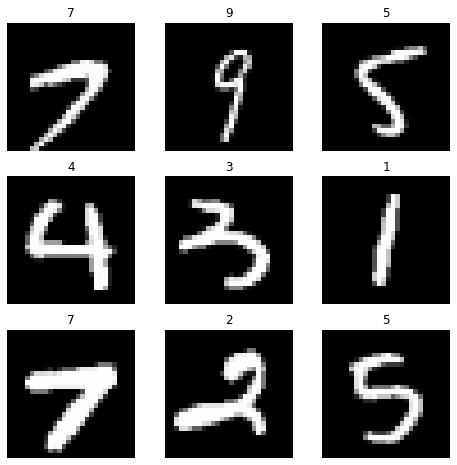

In [6]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
#image 3 by 3 arrange
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [8]:
for epoch in range(20):
    loss_val = 0
    for itr, data in enumerate(train_loader):
        optimizer.zero_grad()
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        pred = net(inputs)
        loss = loss_func(pred, labels)

        loss.backward()
        optimizer.step()

        loss_val += loss.item()

    print("Loss: ", loss_val)

Loss:  285.6238056346774
Loss:  109.6837215879932
Loss:  73.5773155996576
Loss:  53.32682086271234
Loss:  40.026572107570246
Loss:  30.804127201088704
Loss:  25.045197707077023
Loss:  19.581237635502475
Loss:  16.64486500636849
Loss:  13.345686195447342
Loss:  13.649492333686794
Loss:  12.825233675626805
Loss:  8.003144070906274
Loss:  11.009227303035459
Loss:  7.325385519359315
Loss:  8.71137545069837
Loss:  9.618856619400276
Loss:  6.883735063022243
Loss:  6.7670162666800024
Loss:  5.644619237771167


In [9]:
input_test = test_data.data.float().to(device)
pred_test = net(input_test)
pred_category = torch.argmax(pred_test, dim=1)

label_test = test_data.targets.to(device)
accu = torch.mean((pred_category == label_test).float())
print("Test accuracy:", accu)

Test accuracy: tensor(0.9787, device='cuda:0')
